<a href="https://colab.research.google.com/github/GauravB7/DS_Capstone/blob/master/Data_Science_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Setting up Java Environment to Java 8 from Default Java 11
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.1/spark-2.4.1-bin-hadoop2.7.tgz
!tar xf spark-2.4.1-bin-hadoop2.7.tgz
!pip install -q findspark

tar: spark-2.4.1-bin-hadoop2.7.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
#Installing the Pyspark library
!pip install pyspark==2.4.5

     |████████████████████████████████| 217.8MB 54kB/s 
     |████████████████████████████████| 204kB 37.9MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257927 sha256=445a234789ad63222861a3946d3a69ce409ce8fdf1fe5a3178c2f7137c8e8f94
  Stored in directory: /root/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark


In [ ]:
#Checking whether pyspark installed properly or not and importing necessary packages out of it
try:
    from pyspark import SparkContext, SparkConf
    from pyspark.sql import SparkSession
except ImportError as e:
    printmd('<<<<<!!!!! Please restart your kernel after installing Apache Spark !!!!!>>>>>')

In [ ]:
#Creating an Spark instance
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()

In [ ]:
import pandas             #importing pandas library to read csv file and create dataframe out of it
df=pandas.read_csv('https://raw.githubusercontent.com/GauravB7/DS_Capstone/master/datasets_644702_1143107_INDIAVIX.csv')
df=spark.createDataFrame(df)  #Converting pandas dataframe to spark dataframe

In [ ]:
df.createOrReplaceTempView("df")  #Creating a Table view of the DataFrame
spark.sql("SELECT * from df").show()  #A look at the data 

+----------+-----+-----+-----+-----+--------+------+--------------------+
|      Date| Open| High|  Low|Close|Previous|Change|             %Change|
+----------+-----+-----+-----+-----+--------+------+--------------------+
|2009-03-02|43.19|43.38|41.44|43.17|     NaN|   0.0|                 0.0|
|2009-03-03|43.17| 43.9| 41.2|43.89|   43.17|  0.72|              0.0167|
|2009-03-04|43.89|43.89|42.16|42.52|   43.89| -1.37|             -0.0312|
|2009-03-05|42.52|42.71|40.41|41.49|   42.52| -1.03|             -0.0242|
|2009-03-06|41.49|41.49|37.57|38.16|   41.49| -3.33|             -0.0803|
|2009-03-09|38.16|41.14|38.16|40.87|   38.16|  2.71|               0.071|
|2009-03-12|40.87|40.87| 38.5|39.27|   40.87|  -1.6|             -0.0391|
|2009-03-13|39.27|39.27|35.08|35.56|   39.27| -3.71|             -0.0945|
|2009-03-16|35.56|37.88|35.56| 36.7|   35.56|  1.14|0.032100000000000004|
|2009-03-17| 36.7|38.76|34.85|38.43|    36.7|  1.73|              0.0471|
|2009-03-18|38.43|38.86|36.99|38.15|  

In [ ]:
import numpy as np

means=spark.sql("select mean(Open),mean(High),mean(Low),mean(Close) from df").collect() #Calculating mean values of Open,High,Low and Close Columns
means=np.array(means)
means


array([[19.63703684, 20.55077465, 18.29772571, 19.76584056]])

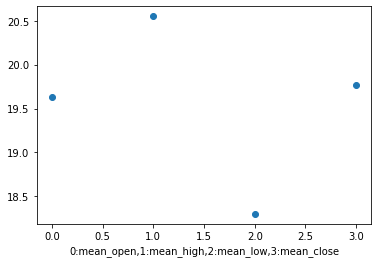

In [ ]:
#Plotting the means using Scatter Plots
%matplotlib inline
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter([0,1,2,3],means)
ax.set_xlabel('0:mean_open,1:mean_high,2:mean_low,3:mean_close')
plt.show()

In [ ]:
#Calculating Standard Deviations of the columns to understand the deviation from Mean value
sds = spark.sql("select stddev(Open),stddev(High),stddev(Low),stddev(Close) from df").collect()
sds


[Row(stddev_samp(Open)=7.917075587369417, stddev_samp(High)=8.439532476533513, stddev_samp(Low)=7.696670099823454, stddev_samp(Close)=8.063059841036065)]

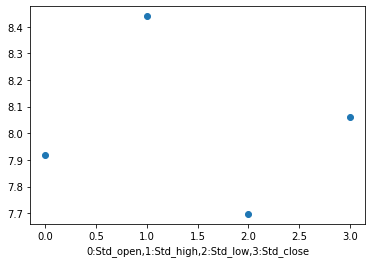

In [ ]:
#Visualizing Standard Deviation values
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter([0,1,2,3],sds)
ax.set_xlabel('0:Std_open,1:Std_high,2:Std_low,3:Std_close')
plt.show()

In [ ]:
#Calculating correlations amongst tables to understand the degrees of correlation
corrs= spark.sql("Select corr(Open,Close),corr(High,Close),corr(Low,Close),corr(Date,Close) from df").collect()
corrs

[Row(corr(Open, Close)=0.9860906428723021, corr(High, Close)=0.9955679803648422, corr(Low, Close)=0.9872261014268391, corr(CAST(Date AS DOUBLE), Close)=None)]

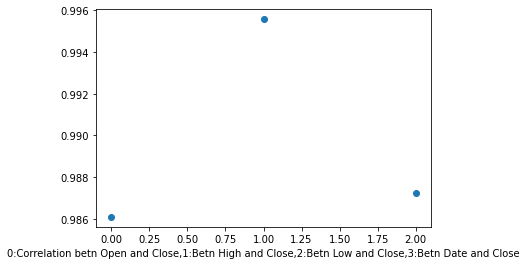

In [ ]:
#Visualizing the Correlations
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter([0,1,2,3],corrs)
ax.set_xlabel('0:Correlation betn Open and Close,1:Betn High and Close,2:Betn Low and Close,3:Betn Date and Close')
plt.show()

In [ ]:
#Extracting Data of interest for training of model
#From correlation above, it is clear that Open,High,Low and close are highly correlated and hence only one of them is sufficient 
x_data = spark.sql("select Date from df").collect() #Extracting Dates as X avriable (input) to the model
x_data=np.array(x_data) #Convert the list to the Array
x_data.reshape(-1,1)  #Converting 1D array to 2D

#Data PreProcessing
#As date format YYYY-MM-DD is not valid to the regressor, we have to convert it into YYYYMMDD format

x_data_new=[] #A list to store the formatted date
for value in np.nditer(x_data,flags=['refs_ok'],op_flags = ['readwrite']): #iterating over array and extracting individual values from it
  val1=str(value) #Converting the value to string datatype
  val = val1.split("-") #Using split function to separate YYYY,MM,DD in list as ['YYYY','MM','DD']
  new_year=str(val[0])  #Extracting Year Value
  new_month=str(val[1]) #Extracting Month Value
  new_date=str(val[2])  #Extracting Day Value
  new_data=new_year+new_month+new_date  #Concatenation of Year,Month and Day to convert it into required form
  x_data_new.append(new_data) #Storing the formatted value in list
x_data=np.array(x_data_new) #Converting list into Numpy array
x_data.reshape(-1,1) #Reshaping x_data to 2D as it is 1D only.

array([['20090302'],
       ['20090303'],
       ['20090304'],
       ...,
       ['20200506'],
       ['20200507'],
       ['20200508']], dtype='<U8')

In [ ]:
y_data= spark.sql("Select Close from df").collect() #Collecting Close values as Y (target) value
y_data=np.array(y_data)
y_data.reshape(-1,1)

array([[43.17  ],
       [43.89  ],
       [42.52  ],
       ...,
       [41.2475],
       [39.93  ],
       [38.4075]])

In [ ]:
#Importing train test split function to separate the training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2)  #Separation of datasets with 80:20 ratio
x_train= x_train.reshape(-1,1) #x_train obtained from split is 1D so needs to be reshaped
x_test=x_test.reshape(-1,1) #x_test obtained from split is 1D so needs to be reshaped

In [ ]:
#importing SVR from sklearn
from sklearn.svm import SVR
svr= SVR(C=800,max_iter=160,gamma=0.0025,kernel='rbf',epsilon=0.0025) #Creating an instance to the Support Vector Regressor

In [ ]:
model=svr.fit(x_train,y_train) #Fit the Data to the instance of the SVR

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=160).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [ ]:
eval1=model.score(x_test,y_test)  #Evaluate the SVR with testing dataset
print(eval1)

0.4622955214072178


In [ ]:
# Import pickle Package

import pickle

In [ ]:
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_RG_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [ ]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    model = pickle.load(file)
model

SVR(C=800, cache_size=200, coef0=0.0, degree=3, epsilon=0.0025, gamma=0.0025,
    kernel='rbf', max_iter=160, shrinking=True, tol=0.001, verbose=False)

In [ ]:
start_date=float(input("Enter Start Date ")) #Taking start_date and end_date from user
end_date=float(input("Enter End Date "))
start_pred=model.predict(np.array(start_date).reshape(-1,1))  #Converting values to the required form and making predictions
end_pred=model.predict(np.array(end_date).reshape(-1,1))

start_val=start_pred.item(0)  #Extracting the predicted values
print(start_val)
end_val=end_pred.item(0)
print(end_val)

#Conclusions based on predicted values
if(start_val>end_val):
  print("Fall")
elif(start_val<end_val):
  print("Rise")
else:
  print("No change")

Enter Start Date 20200526
Enter End Date 20200529
28.633685920280975
27.21332187056863
Fall
